#### This project finds the top 5 highest growth rate stocks in Chinese stock market, then visualizes the weekly price of the top one stock

The top 5 highest growth rate stocks are: 

        name  price_x   price_y  growth_rate
code                                        
002838  道恩股份  11.3100   37.8040     2.342529
300526  中潜股份  51.9670  164.9952     2.175000
300677  英科医疗  17.8615   46.7040     1.614786
000652  泰达股份   3.7515    9.2720     1.471545
603200  上海洗霸  19.6308   47.5969     1.424603


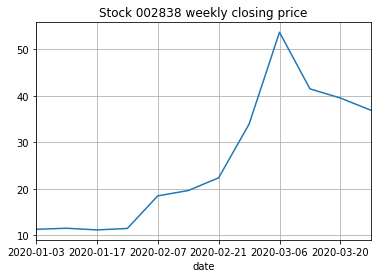

In [33]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt


# find the top 5 stocks with highest growth rate
begin_data = ts.get_stock_basics(date = '20200103')
end_data = ts.get_stock_basics(date = '20200331')

begin_data['price'] = begin_data['bvps']*begin_data['pb']
begin_data = begin_data[begin_data['price']>0]
end_data['price'] = end_data['bvps']*end_data['pb']

merge_data = pd.merge(begin_data[['name','price']],end_data['price'],on= 'code', how = 'left')
merge_data['growth_rate'] = merge_data['price_y']/merge_data['price_x']-1

merge_data_sorted = merge_data.sort_values('growth_rate',ascending = False)
print('The top 5 highest growth rate stocks are: \n')
print(merge_data_sorted.head())

# pull out the highest_growth_rate_stock
stock = merge_data_sorted.index[0]

# pull the weekly price for the highest_growth_rate_stock then make plot
highest_growth_rate_stock = ts.get_hist_data(stock, start='2020-01-03',end='2020-03-31',ktype = 'W')[::-1]
highest_growth_rate_stock['close'].plot(grid = True)
plt.title('Stock ' + str(stock) + ' weekly closing price')
plt.show()